<a href="https://colab.research.google.com/github/Divyam9953/Artificial-Intelligence-Deep-Learning-Machine-Learning-Tutorials/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [3]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print('Training Data:', train_X.shape)
print('Test Data:', test_X.shape)

Training Data: (60000, 28, 28)
Test Data: (10000, 28, 28)


In [5]:
classes = np.unique(train_Y)
nclasses = len(classes)
print('Total number of classes:', nclasses)
print('Output classes:', classes)

Total number of classes: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


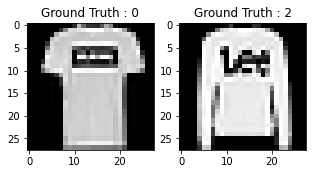

In [6]:
plt.figure(figsize=[5,5])

# Displaying first image in train dataset
plt.subplot(121)
plt.imshow(train_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[1]))

# Displaying first image in test dataset
plt.subplot(122)
plt.imshow(test_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[1]))
plt.show()

In [7]:
# Data Preprocessing
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape,test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# Changing datatype
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# Rescaling the pixel values
train_X = train_X/255.0
test_X = test_X/255.0

In [9]:
# Changing the labels from categorical to one hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# Splitting the data
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [12]:
# Importing libraries for Modelling the Data
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

In [14]:
# Building Model
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

fashion_model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

fashion_model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2,2), padding='same'))


fashion_model.add(Flatten())
fashion_model.add(Dense(units=128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [15]:
# Compiling the Model
fashion_model.compile(loss=keras.losses.categorical_crossentropy ,optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
# Visualizing the layers
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [17]:
# Training the Model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4842 - accuracy: 0.8227 - val_loss: 0.3262 - val_accuracy: 0.8820
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2971 - accuracy: 0.8913 - val_loss: 0.2866 - val_accuracy: 0.8953
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2480 - accuracy: 0.9089 - val_loss: 0.2466 - val_accuracy: 0.9100
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2148 - accuracy: 0.9212 - val_loss: 0.2393 - val_accuracy: 0.9147
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1861 - accuracy: 0.9321 - val_loss: 0.2313 - val_accuracy: 0.9162
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1649 - accuracy: 0.9389 - val_loss: 0.2280 - val_accuracy: 0.9187
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.1464 - accuracy: 0.9451 - val_loss: 0.2226 - val_accuracy: 0.9231
Epoch 

In [18]:
# Model Evaluation on Test Data
fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

[0.4731437861919403, 0.9156000018119812]

In [19]:
# Adding Dropout into the network
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [20]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [21]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.6082 - accuracy: 0.7741 - val_loss: 0.3776 - val_accuracy: 0.8578
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3827 - accuracy: 0.8590 - val_loss: 0.3280 - val_accuracy: 0.8760
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3324 - accuracy: 0.8773 - val_loss: 0.2818 - val_accuracy: 0.8954
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3039 - accuracy: 0.8863 - val_loss: 0.2640 - val_accuracy: 0.9031
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2810 - accuracy: 0.8966 - val_loss: 0.2499 - val_accuracy: 0.9069
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2701 - accuracy: 0.8991 - val_loss: 0.2365 - val_accuracy: 0.9122
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2564 - accuracy: 0.9059 - val_loss: 0.2298 - val_accuracy: 0.9153
Epoch 

In [23]:
# Saving the Model
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [27]:
# Model Evaluation on Test Data
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2069 - accuracy: 0.9234


In [29]:
# Predicting Labels
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9191 correct labels


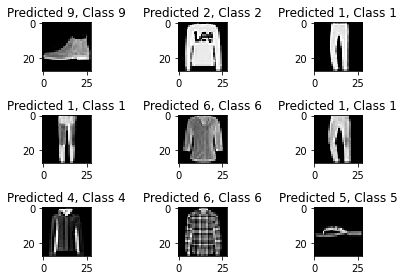

In [31]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 809 incorrect labels


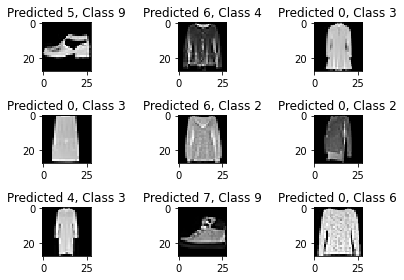

In [35]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [36]:
# Classification Report
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.87      0.82      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.88      0.89      1000
     Class 3       0.94      0.91      0.92      1000
     Class 4       0.90      0.85      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.77      0.78      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

